In [1]:
!ls data

sample_submission.csv  test.csv  train.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [3]:
df = pd.read_csv('data/train.csv')
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
imgs = {}

for _, row in df.iterrows():
    label = row[df.columns == 'label'][0]
    data = row[df.columns != 'label']

    if label not in imgs:
        imgs[label] = []
        
    imgs[label].append(data.to_numpy(dtype=np.uint8).reshape((28, 28)))

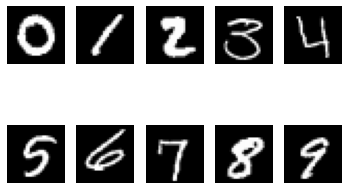

In [5]:
_, axes = plt.subplots(2, 5)

for label, ax in enumerate(axes.flatten()):
    ax.imshow(imgs[label][0], cmap='gray')
    ax.axis('off')

plt.show()

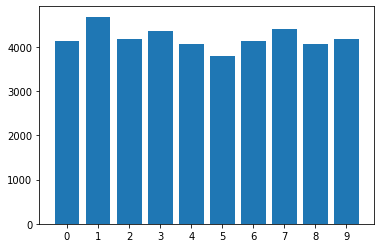

In [6]:
plt.bar(range(10), [len(imgs[label]) for label in range(10)])

plt.xticks(range(10))

plt.show()

In [7]:
X = df.loc[:, df.columns != 'label']
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

classifier = MLPClassifier(hidden_layer_sizes=(64), max_iter=100, verbose=True)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
     
    classifier.fit(X_train, y_train)

Iteration 1, loss = 4.98452962
Iteration 2, loss = 1.09145025
Iteration 3, loss = 0.72918654
Iteration 4, loss = 0.57241196
Iteration 5, loss = 0.47426261
Iteration 6, loss = 0.41060191
Iteration 7, loss = 0.35878937
Iteration 8, loss = 0.32435302
Iteration 9, loss = 0.29027569
Iteration 10, loss = 0.27007378
Iteration 11, loss = 0.25186316
Iteration 12, loss = 0.22846742
Iteration 13, loss = 0.21162713
Iteration 14, loss = 0.20433873
Iteration 15, loss = 0.18885742
Iteration 16, loss = 0.18117380
Iteration 17, loss = 0.17357148
Iteration 18, loss = 0.16278918
Iteration 19, loss = 0.15230891
Iteration 20, loss = 0.14928099
Iteration 21, loss = 0.14242700
Iteration 22, loss = 0.13988249
Iteration 23, loss = 0.13533418
Iteration 24, loss = 0.13967069
Iteration 25, loss = 0.13713735
Iteration 26, loss = 0.13558814
Iteration 27, loss = 0.11859839
Iteration 28, loss = 0.11539600
Iteration 29, loss = 0.11614168
Iteration 30, loss = 0.11446450
Iteration 31, loss = 0.10371165
Iteration 32, los

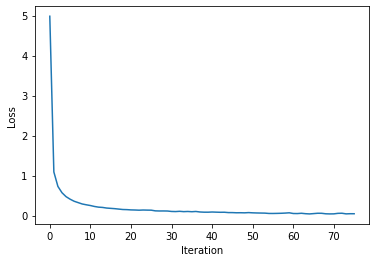

In [8]:
plt.plot(classifier.loss_curve_)
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.show()

In [9]:
def check_prediction(X, y):
    y_predicted = classifier.predict(X)
    
    print("correctly predicted:", (y == y_predicted).sum())
    print("incorrectly predicted:", (y != y_predicted).sum())

In [10]:
check_prediction(X_train, y_train)

correctly predicted: 33111
incorrectly predicted: 489


In [11]:
check_prediction(X_test, y_test)

correctly predicted: 7945
incorrectly predicted: 455


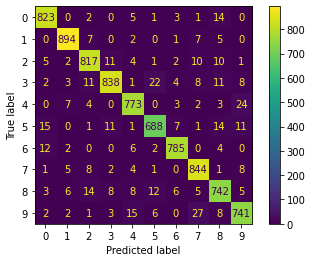

In [12]:
y_test_predicted = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_test_predicted)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

plt.show()